### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。
* 「技術分析」書籍整理：  
  - [專買黑馬股 出手就賺30%](https://www.books.com.tw/products/0010846449)、[專買黑馬股2：從魚頭吃到魚尾的飆股操作法](https://www.books.com.tw/products/0010929705)、[專買黑馬股3：K線捕手楊忠憲教你用1張表逮飆股](https://www.books.com.tw/products/0011010836)  
  - [楊忠憲教你 指標與線型實戰（一）DVD](https://www.books.com.tw/products/0010817314)  
  - [杜金龍技術指標聖經](https://www.books.com.tw/products/0010894574)  
  - [高勝率膽小投資買賣筆記：超佛系小資族短線獲利法，每週進場一次，每月幫自己加薪22K！](https://www.books.com.tw/products/0010974405)  
  - [技術分析精論：二十年來投資界最完整的技術分析全圖解(上)](https://www.books.com.tw/products/0010725781)、[技術分析精論：二十年來投資界最完整的技術分析全圖解(下)](https://www.books.com.tw/products/0010725792)  
  - [金融市場技術分析 (暢銷經典版) (上)](https://www.books.com.tw/products/0010903677)、[金融市場技術分析 (暢銷經典版) (下)](https://www.books.com.tw/products/0010903674)  
  - [約翰墨菲視覺分析：回歸最單純的圖形解析，解讀全球市場最深層的故事](https://www.books.com.tw/products/0010859153)  
  - [股票交易精鍊手冊：提升個人化選股、買賣程序到資產配置的張力交易法](https://www.books.com.tw/products/0010851121)（[原文專用網站](https://www.wiley.com/WileyCDA/Section/id-828237.html)）
  - 【**新增**】[波段交易獲利攻略：從入門到實戰，一次掌握分析指標、進出時點與風險控管的操作策略](https://www.books.com.tw/products/0010990386)  
  - 【**新增**】[一個投機者的告白四部曲（《一個投機者的告白》《金錢遊戲》《證券心理學》《股市解答之書》四書）](https://www.books.com.tw/products/0010999880)  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
import base64
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  
  - 前幾天修改[UpdatestockDatabase](https://github.com/yilintung/StockInvestmentNotebook/blob/main/mysys/Utilities.py#L183)函式以對應[FinMind](https://finmindtrade.com/) API在技術面資料之變動，其方式為：  
    １． 從資料表(DailyPrice或WeeklyPrice或MonthlyPrice)刪除該日所有股票之技術面資料。  
    ２． 重新寫入(附加)該日所有股票之技術面資料至資料表(DailyPrice或WeeklyPrice或MonthlyPrice)中。  
    但這樣的更新方式會造成資料表內的技術面資料有可能不會照著日期順序排列，因此又做了[_loading_price_data](https://github.com/yilintung/StockInvestmentNotebook/blob/main/mysys/StockAnalysis.py#L730)方法與[DrawOnKlineChart](https://github.com/yilintung/StockInvestmentNotebook/blob/main/mysys/Utilities.py#L46)函式的修正。
    是否為還有其他問題則還需要持續驗證，另外是否還有更好的更新方法則有待檢討。  

In [3]:
mysys.UpdatestockDatabase()

2025-12-04 22:17:34.573 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 1710：股票名稱 ＝ 東聯，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1713：股票名稱 ＝ 國化，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1730：股票名稱 ＝ 花仙子，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1733：股票名稱 ＝ 五鼎，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1760：股票名稱 ＝ 寶齡富錦，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1762：股票名稱 ＝ 中化生，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1783：股票名稱 ＝ 和康生，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 2059：股票名稱 ＝ 川湖，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2303：股票名稱 ＝ 聯電，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2305：股票名稱 ＝ 全友，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2317：股票名稱 ＝ 鴻海，產業類別 ＝ 其他電子業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2321：股票名稱 ＝ 東訊，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2330：股票名稱 ＝ 台積電，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2331：股票名稱 ＝ 精英，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2336：股票名稱 ＝ 致伸，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2341：股票名稱 ＝ 英群，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2344：股票名稱 ＝ 華邦電，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2345：股票名稱 ＝ 智邦，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2353：股票名稱 ＝ 宏碁，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2354：股票名稱 ＝ 鴻準

2025-12-04 22:17:35.894 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-11-24
【略過】週Ｋ：2025-11-24


2025-12-04 22:17:45.697 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-11-25


2025-12-04 22:17:53.358 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-11-26


2025-12-04 22:18:00.850 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-11-27


2025-12-04 22:18:08.227 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-11-28


2025-12-04 22:18:15.443 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-04 22:18:19.303 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-04 22:18:23.169 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-01
【略過】週Ｋ：2025-12-01


2025-12-04 22:18:56.894 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-02


2025-12-04 22:19:04.152 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-03


2025-12-04 22:19:12.585 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2025-12-04


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：櫃買指數和加權指數，幾乎是平盤開出，變化不大。  
> 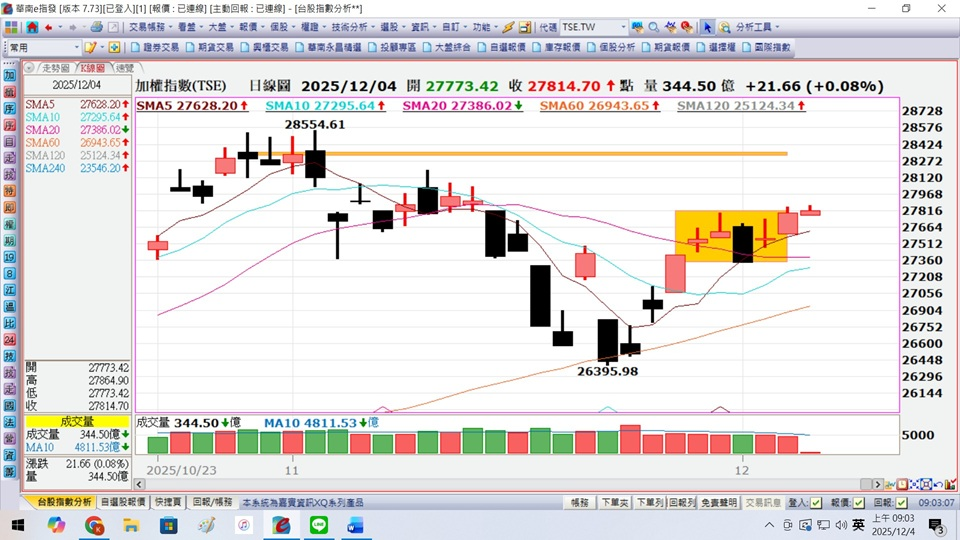  

In [5]:
# 壓力線與支撐線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2025-10-30'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-11-03']['Close']

    # 壓力線
    resistance_line1_start_date = '2025-11-26'
    resistance_line1_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line1_price      = range_prices.loc['2025-12-03']['Close']
    
    # 支撐線
    support_line1_start_date = '2025-11-26'
    support_line1_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line1_price      = range_prices.loc['2025-12-01']['Close']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line1_start_date,support_line1_price),(support_line1_end_date,support_line1_price)],
        [(resistance_line1_start_date,resistance_line1_price),(resistance_line1_end_date,resistance_line1_price)],
    ]

    linewidths=[2.0,1.0,1.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

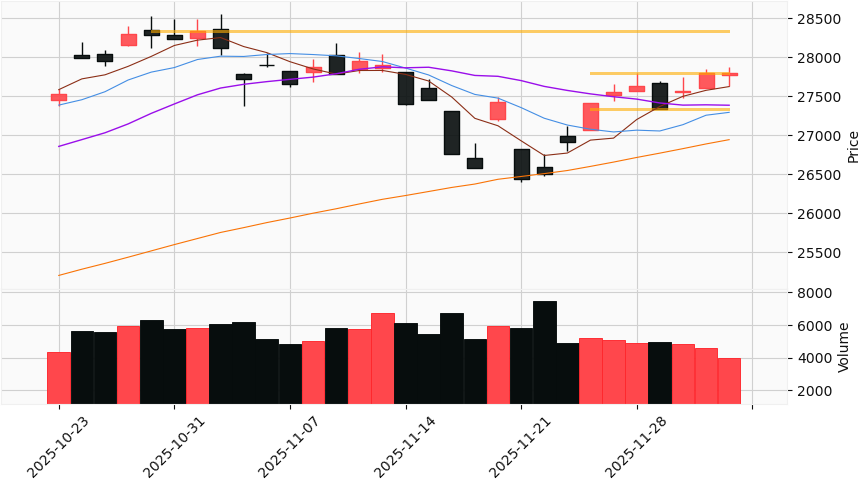

In [6]:
# 收盤：壓力線與支撐線
image = mysys.DrawOnKlineChart('TAIEX','2025-10-23','2025-12-04',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


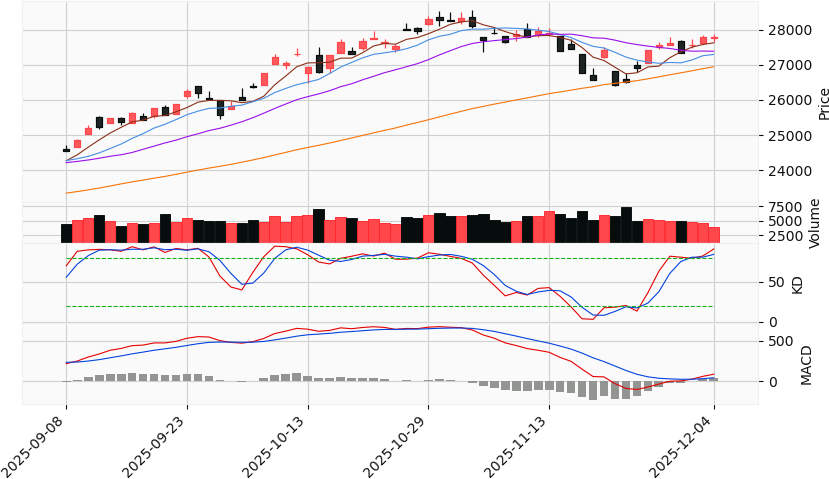

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2025-12-02 , 2025-12-04 十字線 : 2025-12-02 , 2025-12-04 吞噬 : 2025-12-01 孕育線／懷抱線 : 2025-12-02"
Ｋ線圖,中期為中位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 3979.86億元 ，十日均量 ＝ 5176.96億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-06-10時已達估算之目標價（22257.56點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線下彎、60日線上揚，中期盤整；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-03黃金交叉。並且2025-12-04於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-10-20當週死亡交叉。
整體評價,根據圖表分析： 價格趨勢 近期價格呈現上漲趨勢，K線多為紅K，顯示多頭力量較強。短期移動平均線（5日、10日）向上，且價格位於這些均線之上，顯示短期趨勢向好。 價量關係 成交量在上漲過程中有所減少，顯示出量價背離的情況，需留意後續量能是否能夠配合價格上漲。 支撐與壓力 支撐位可參考短期移動平均線附近，約在27600點左右。壓力位則在近期高點27800點附近。 KD指標 KD指標中的K線和D線均位於超買區，顯示短期內可能有回檔壓力，但目前K線仍在D線之上，顯示多頭仍有優勢。 MACD指標 MACD指標顯示多頭趨勢，DIF線在MACD線之上，且柱狀體持續增長，顯示出市場的上漲動能。 綜合評價 整體來看，市場目前處於上漲趨勢，但需注意成交量的配合以及KD指標的超買狀態。建議投資者在短期內保持謹慎，若價格突破壓力位且量能配合，則可考慮加碼；若出現回檔，則可在支撐位附近尋找買入機會。


In [7]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數和加權指數，幾乎是平盤開出，變化不大。  
> 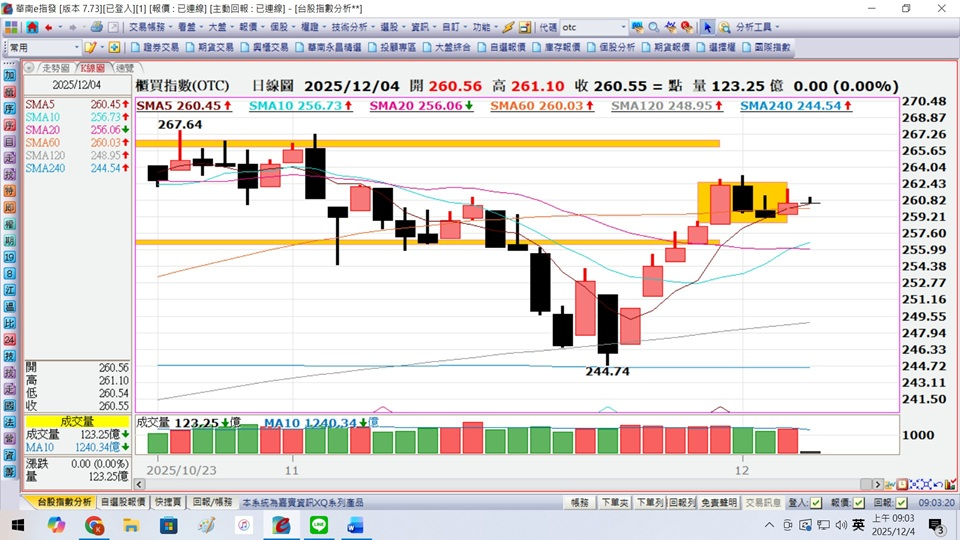  

In [8]:
# 壓力線與支撐線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2025-10-23'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-11-03']['High']

    # 支撐線
    support_line_start_date = '2025-10-23'
    support_line_end_date   = '2025-11-28'
    support_line_price      = range_prices.loc['2025-11-27']['Open']

    # 壓力線
    resistance_line1_start_date = '2025-11-27'
    resistance_line1_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line1_price      = range_prices.loc['2025-11-28']['Close']
    
    # 支撐線
    support_line1_start_date = '2025-11-27'
    support_line1_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line1_price      = range_prices.loc['2025-11-27']['High']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)],
        [(support_line1_start_date,support_line1_price),(support_line1_end_date,support_line1_price)],
        [(resistance_line1_start_date,resistance_line1_price),(resistance_line1_end_date,resistance_line1_price)],
    ]

    linewidths=[5.0,3.0,1.0,1.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

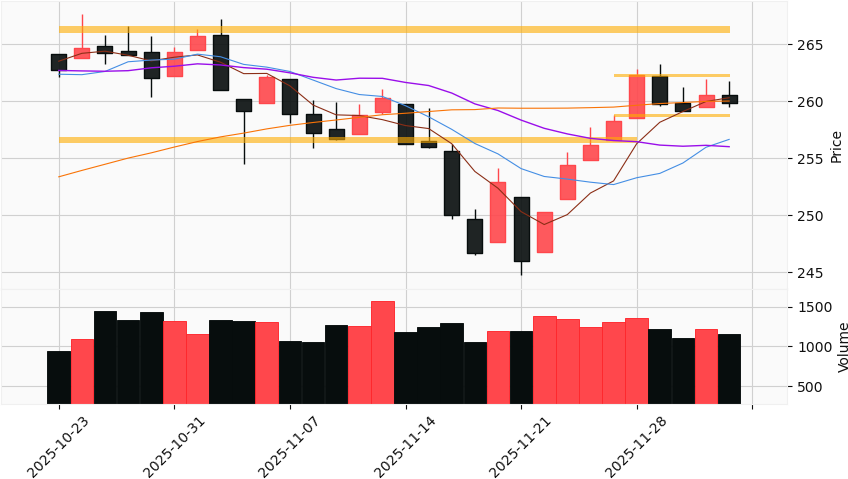

In [9]:
# 收盤：壓力線與支撐線
image = mysys.DrawOnKlineChart('TPEx','2025-10-23','2025-12-04',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


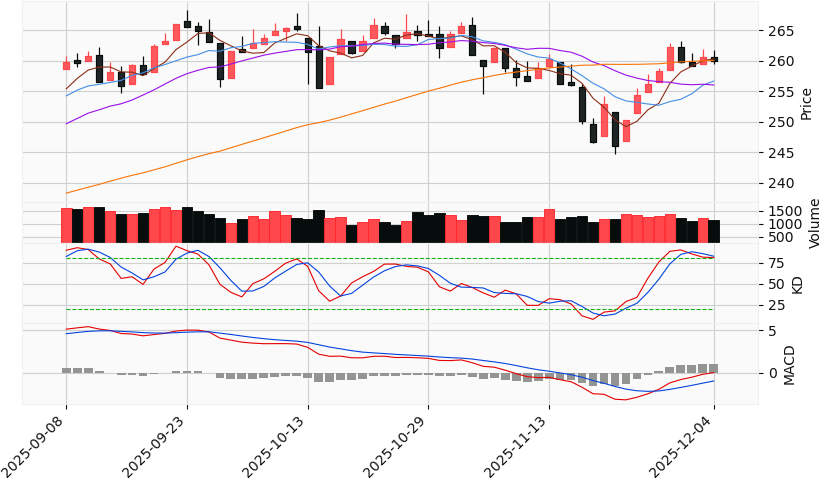

技術分析工具,解盤內容
Ｋ線／Ｋ棒,孕育線／懷抱線 : 2025-12-01
Ｋ線圖,中期為中位階 長期為中位階
成交量,價量關係：未至大量門檻（成交量 ＝ 1150.65億元 ，十日均量 ＝ 1252.73億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-08-18時已達估算之目標價（247.79點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線下彎、60日線上揚，中期盤整；120日線上揚、240日線走平，長期盤整
ＫＤ指標,於2025-12-02死亡交叉。並且2025-12-04於超買區。
ＭＡＣＤ指標,MACD在零軸以下，中期空方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。
整體評價,根據圖表分析： 價格趨勢 近期價格呈現盤整狀態，雖然有小幅上漲，但整體波動不大。短期移動平均線（5日、10日）在價格上方，顯示短期內有一定的壓力。 價量關係 成交量在最近幾天有所減少，顯示市場交投清淡，買賣雙方觀望情緒較重。價量配合不佳，短期內可能缺乏明顯的上漲動能。 支撐與壓力 - 支撐位：大約在259點附近，接近近期低點。 - 壓力位：大約在262點附近，接近近期高點。 KD指標 KD指標顯示K線和D線在高位區域，並有下行趨勢，暗示可能進入超買區後的回檔風險。 MACD指標 MACD線和信號線接近零軸，且DIF線略高於MACD線，顯示短期內有轉強的跡象，但整體動能仍然較弱。 綜合評價 目前市場處於盤整階段，短期內可能會在支撐和壓力位之間波動。由於成交量不足，價格上行動能有限。建議投資者謹慎觀望，等待更明確的趨勢信號再行動。若價格突破壓力位，則可考慮進一步看多；若跌破支撐位，則需注意風險控制。


In [10]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

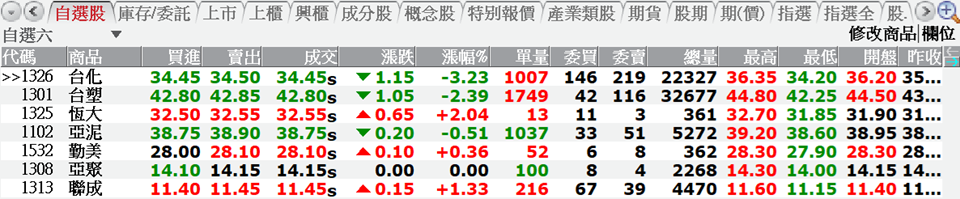  

* 中鼎(9933)  
  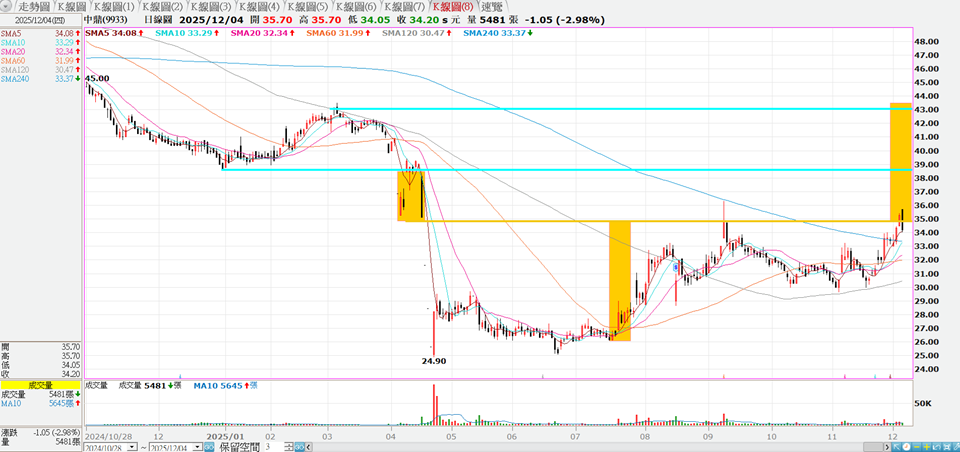  
* 類比科(3438)  
  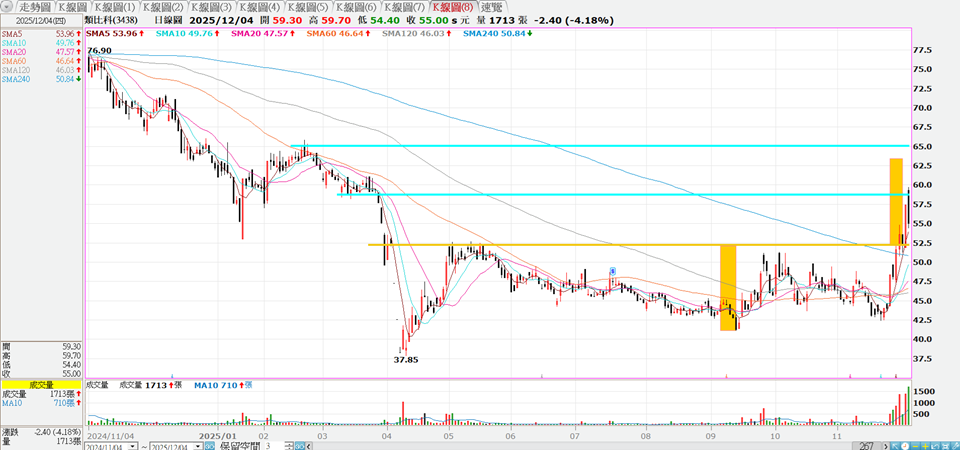  
* 台塑(1301)  
  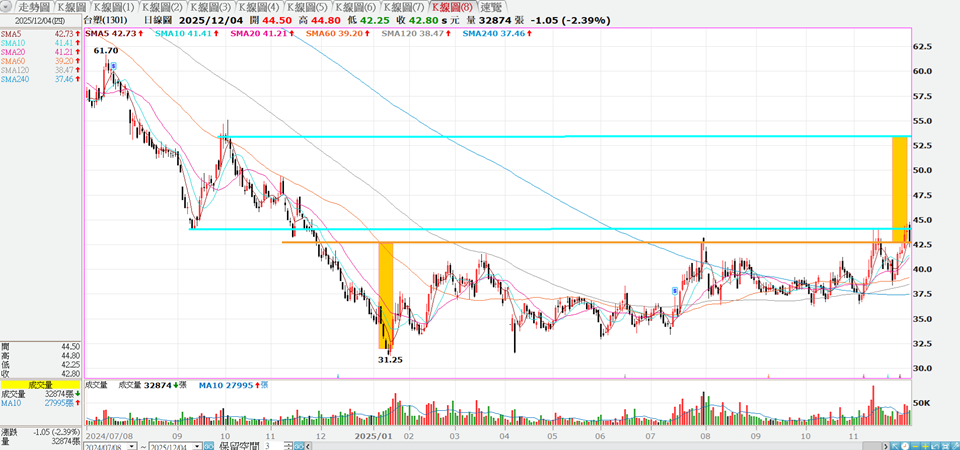  
* 吉祥全(2491)  
  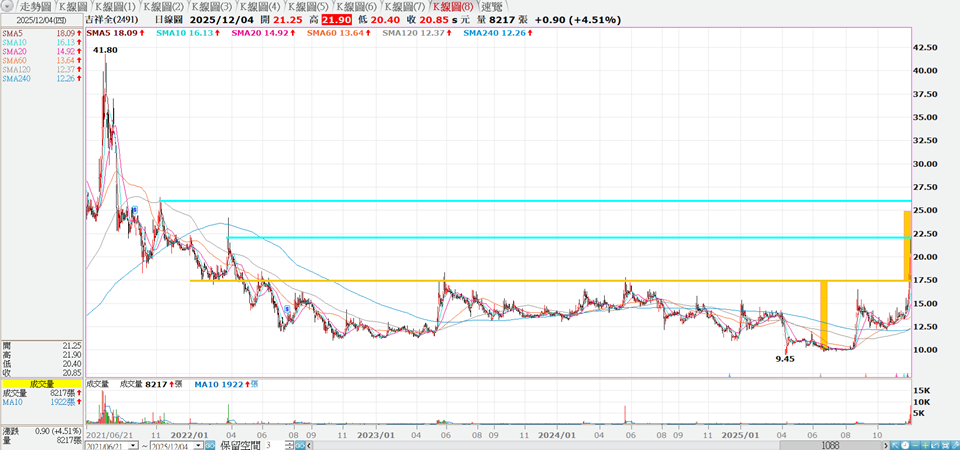  
* 慧洋-KY(2637)  
  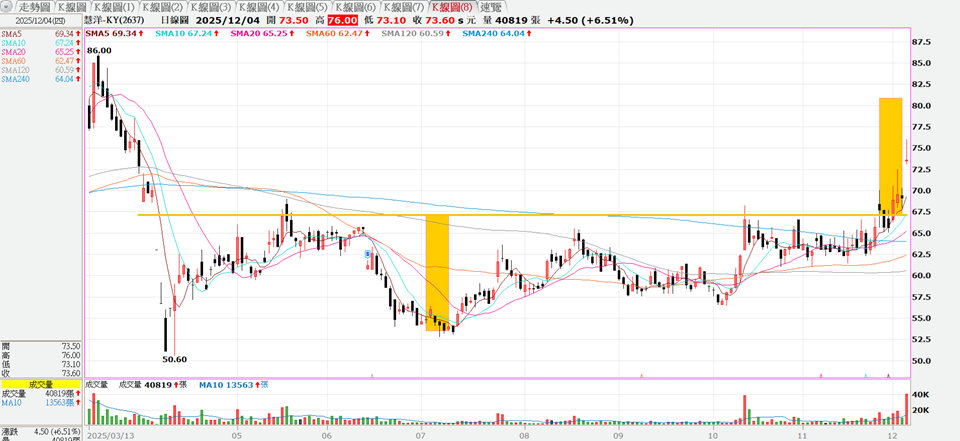  
* 裕民(2606)  
  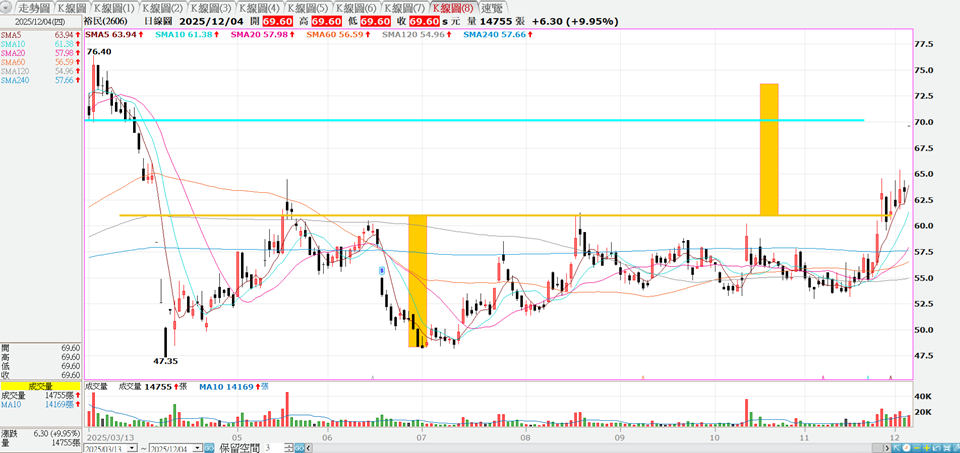  
* 亞泥(1102)  
  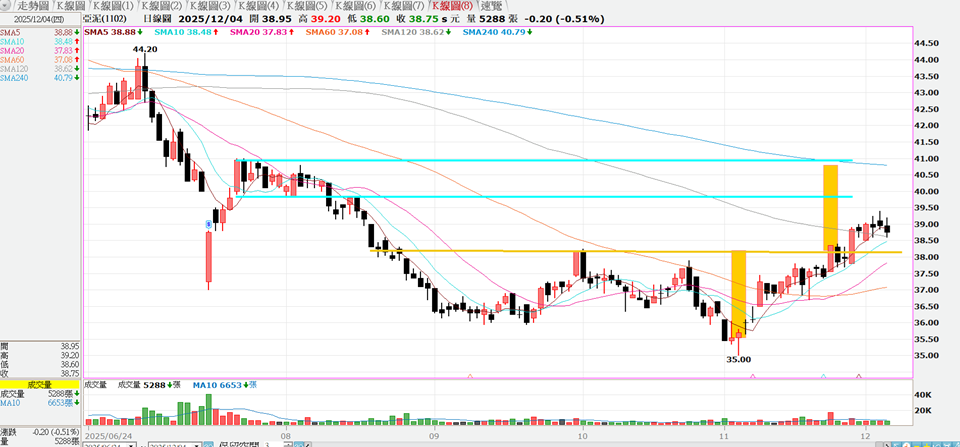  
* 台達化(1309)  
  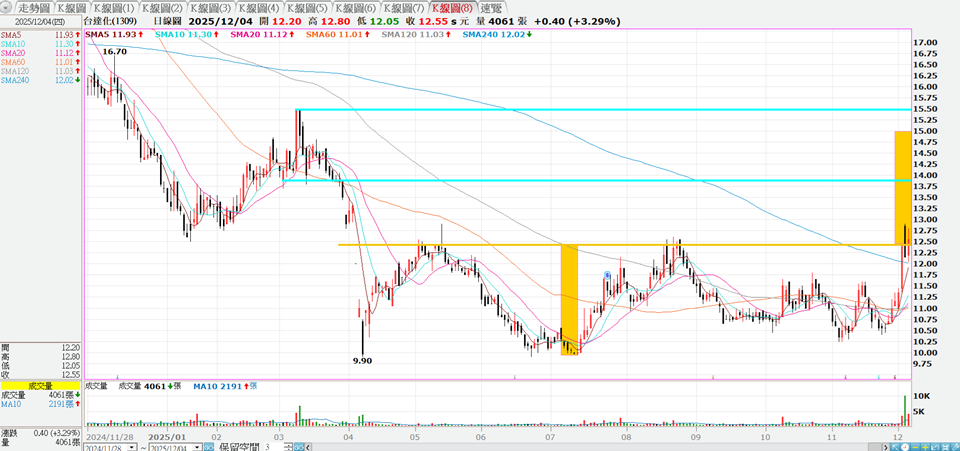  
* 聯成(1313)  
  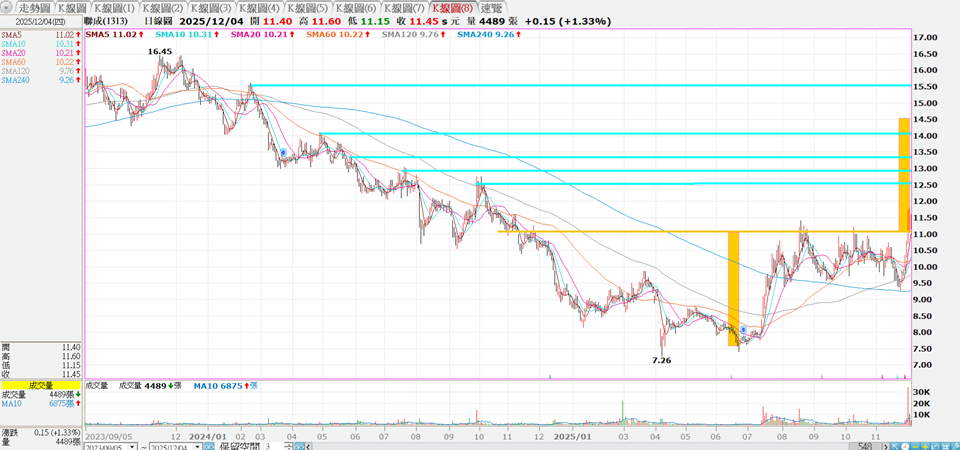  

### 個股解盤  

* 台化(1326)  
  看法：跌破前波支撐，但回測頸線支撐有守。            

> **盤後**：量化技術分析  

解盤內容：


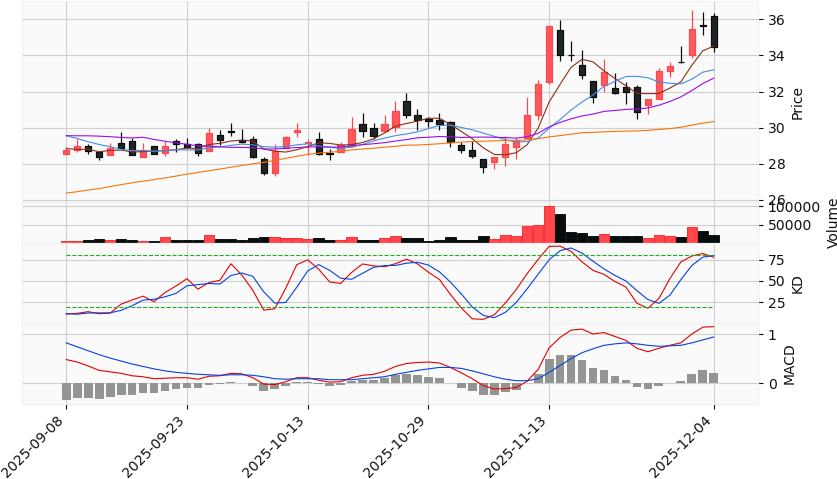

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2025-12-01 , 2025-12-03 十字線 : 2025-12-01 , 2025-12-03 高檔夜星 : 2025-12-04"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 22437張 ，十日均量 ＝ 22581張）
型態,盤整型態之矩形，型態範圍由2025-08-22開始到2025-11-12結束。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-04死亡交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-17當週黃金交叉。
整體評價,技術分析 價格趨勢 近期股價呈現上漲趨勢，尤其在11月中旬後出現明顯的上升走勢。K線圖顯示多數為紅K，顯示多頭力量較強。 價量關係 成交量在價格上漲時有明顯放大，尤其在12月初的高點，顯示市場對此價格區間的認同度較高，價量配合良好。 支撐與壓力 - 支撐位：34元附近，該價位曾多次成為回檔的支撐。 - 壓力位：36.5元附近，為近期高點，可能面臨獲利了結的壓力。 KD指標解讀 KD指標目前在高檔區域，K線略微下彎，顯示短期內可能有回檔壓力，但整體仍在多頭區域。 MACD指標解讀 MACD線與信號線均在零軸上方，且柱狀體顯示多頭動能仍在增強，但近期柱狀體略有縮短，需注意多頭動能可能減弱。 綜合評價 整體來看，股價目前處於上升趨勢中，短期內可能會有小幅回檔，但中期趨勢仍看好。建議投資者在支撐位附近考慮進場，並在接近壓力位時謹慎操作，適時考慮停利。若價格跌破支撐位，需考慮停損以控制風險。


In [11]:
stock_analysis(analysis,'1326')

> **盤後**：底部反轉交易策略分析  

In [12]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-12-10'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-22']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-06-20'
    bottom_price = range_prices.loc['2025-06-20']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-11-13'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為41.35元


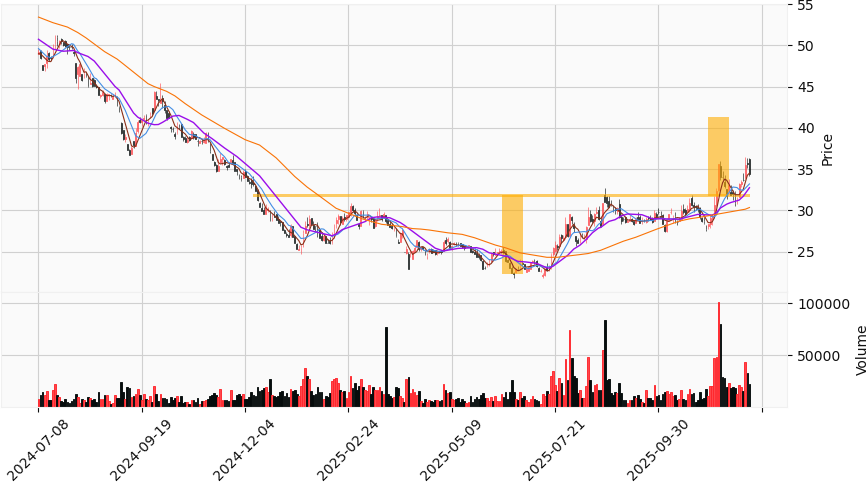

In [13]:
image = mysys.DrawOnKlineChart('1326','2024-07-08','2025-12-04',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-1698)：外資小賣(-1272)、投信中立(-17)、自營大賣(-409)。  
主力小賣(-2087)。  
分公司買賣家數差分散(-78)。  
融資大減(-2175)、融券減(-38)。  